<div class="alert alert-info">
           <h1 style="font-size:25px;"><strong>Projet 4</strong></h1>
           <h1 style="font-size:25px;"><strong>Anticipez les besoins en consommation de bâtiments</strong></h1>
</div>

[camino]:LogoSeattle.png
![alt text][camino]

Des relevés minutieux ont été effectués par les agents de la ville en 2016. Voici les données et leur source. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.

<div class="alert alert-info">
           <h1 style="font-size:25px;"><strong>Étape 2. Analysis SiteEnergyUseWN - Notebook </strong></h1>
</div>

## <font color="#00afe6">Sommaire</font>

[Imports, Chargemernts et connaisance de données. ](#section_A)                                 
[01.Préparation de SiteEnergyUseWN](#section_1)                         
[02. Infos sur X et y](#section_2)                    
[03. Modélisation](#section_3)               
[04. Comparaison des modèles](#section_4)              
[05. Vérification des prédictions](#section_5)                  
[06. Intérêt du Energy Star Score](#section_6)  
[07. Liens importants](#section_7)  

<div class="alert alert-info">
    <font id="section_A">
    <h1 style="font-size:25px;"><strong>Imports, Chargemernts et connaisance de données. </strong></h1>
</div>

In [8]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import seaborn as sns
import sys
import IPython as ip
import statsmodels as stat
import sklearn

import datetime
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

import warnings
warnings.filterwarnings('ignore')

#Modelisation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [9]:
# Enregistrer le temps de début
début = time.time()

In [10]:
# Install
!pip install xgboost

In [11]:
pd.set_option('display.max_row', 200)
pd.set_option('display.max_column', 70)
pd.set_option('display.precision', 5)
pd.set_option("max_colwidth", 80) 

In [12]:
# Versions
print('Version des librairies utilisées :')
print('Python        : ' + sys.version)
print('NumPy         : ' + np.version.full_version)
print('Pandas        : ' + pd.__version__)
print('Matplotlib    : ' + mpl.__version__)
print('Seaborn       : ' + sns.__version__)
print('Sklearn       : ' + sklearn.__version__)
print('Geopandas     : ' + sns.__version__)
print('IPython       : ' + ip.__version__)
print('statsmodels   : ' + stat.__version__)


now = datetime.datetime.now().isoformat()
print('Lancé le      : ' + now)

Version des librairies utilisées :
Python        : 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]
NumPy         : 1.23.5
Pandas        : 1.5.3
Matplotlib    : 3.7.1
Seaborn       : 0.12.2
Sklearn       : 1.2.2
Geopandas     : 0.12.2
IPython       : 8.12.0
statsmodels   : 0.13.5
Lancé le      : 2023-05-30T15:50:11.745442


In [13]:
datas = pd.read_csv("data_cleaned.csv", low_memory=False)

In [14]:
datas.sample(5)

,Index,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),Outlier,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity,Log2-SiteEnergyUseWN(kBtu)
1273,3032,2016,NonResidential,Worship Facility,3,EAST,1929,1.0,1.0,37700,0,37700,Worship Facility,52225.0,No Use,0.0,No Use,0.0,38.0,4.19555e+06,Normal,47.63193,-122.32126,150.23,3.98,22.00043
1077,2293,2016,Nonresidential COS,Warehouse,2,GREATER DUWAMISH,1962,1.0,1.0,45036,0,45036,Non-Refrigerated Warehouse,21110.0,"Repair Services (Vehicle, Shoe, Locksmith, etc)",14074.0,Office,6755.0,NaN,1.98979e+06,Normal,47.56522,-122.32205,49.53,1.10,20.92418
343,478,2016,NonResidential,Retail Store,2,GREATER DUWAMISH,1993,1.0,1.0,107930,0,107930,Retail Store,107704.0,No Use,0.0,No Use,0.0,57.0,7.58935e+06,Normal,47.57842,-122.33558,100.42,0.93,22.85554
33,43,2016,NonResidential,Hotel,7,DOWNTOWN,1969,1.0,24.0,332210,205970,126240,Hotel,348630.0,No Use,0.0,No Use,0.0,67.0,1.61632e+07,Normal,47.60946,-122.33337,295.33,0.89,23.94621
189,275,2016,NonResidential,Retail Store,7,DOWNTOWN,1914,1.0,4.0,79957,0,79957,Retail Store,35694.0,Office,29723.0,No Use,0.0,25.0,5.17153e+06,Normal,47.61159,-122.33601,36.61,0.46,22.30216


In [15]:
print ("Le dataset compte {} lignes et {} variables".format(datas.shape[0], datas.shape[1]))

Le dataset compte 1370 lignes et 26 variables


In [16]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Index                            1370 non-null   int64  
 1   DataYear                         1370 non-null   int64  
 2   BuildingType                     1370 non-null   object 
 3   PrimaryPropertyType              1370 non-null   object 
 4   CouncilDistrictCode              1370 non-null   int64  
 5   Neighborhood                     1370 non-null   object 
 6   YearBuilt                        1370 non-null   int64  
 7   NumberofBuildings                1370 non-null   float64
 8   NumberofFloors                   1370 non-null   float64
 9   PropertyGFATotal                 1370 non-null   int64  
 10  PropertyGFAParking               1370 non-null   int64  
 11  PropertyGFABuilding(s)           1370 non-null   int64  
 12  LargestPropertyUseTy

In [17]:
datas.dtypes

Index                                int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
CouncilDistrictCode                  int64
Neighborhood                        object
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                     float64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                    float64
SiteEnergyUseWN(kBtu)              float64
Outlier                             object
Latitude                           float64
Longitude                          float64
TotalGHGEmi

In [18]:
#sauvegarde séparée du energy star score
energy_star_score = datas['ENERGYSTARScore']
datas.drop('ENERGYSTARScore', axis=1, inplace=True)

<Axes: >

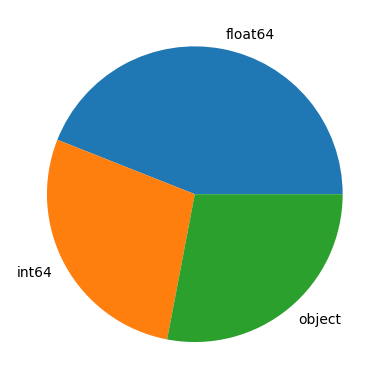

In [19]:
datas.dtypes.value_counts().plot.pie()

<Axes: >

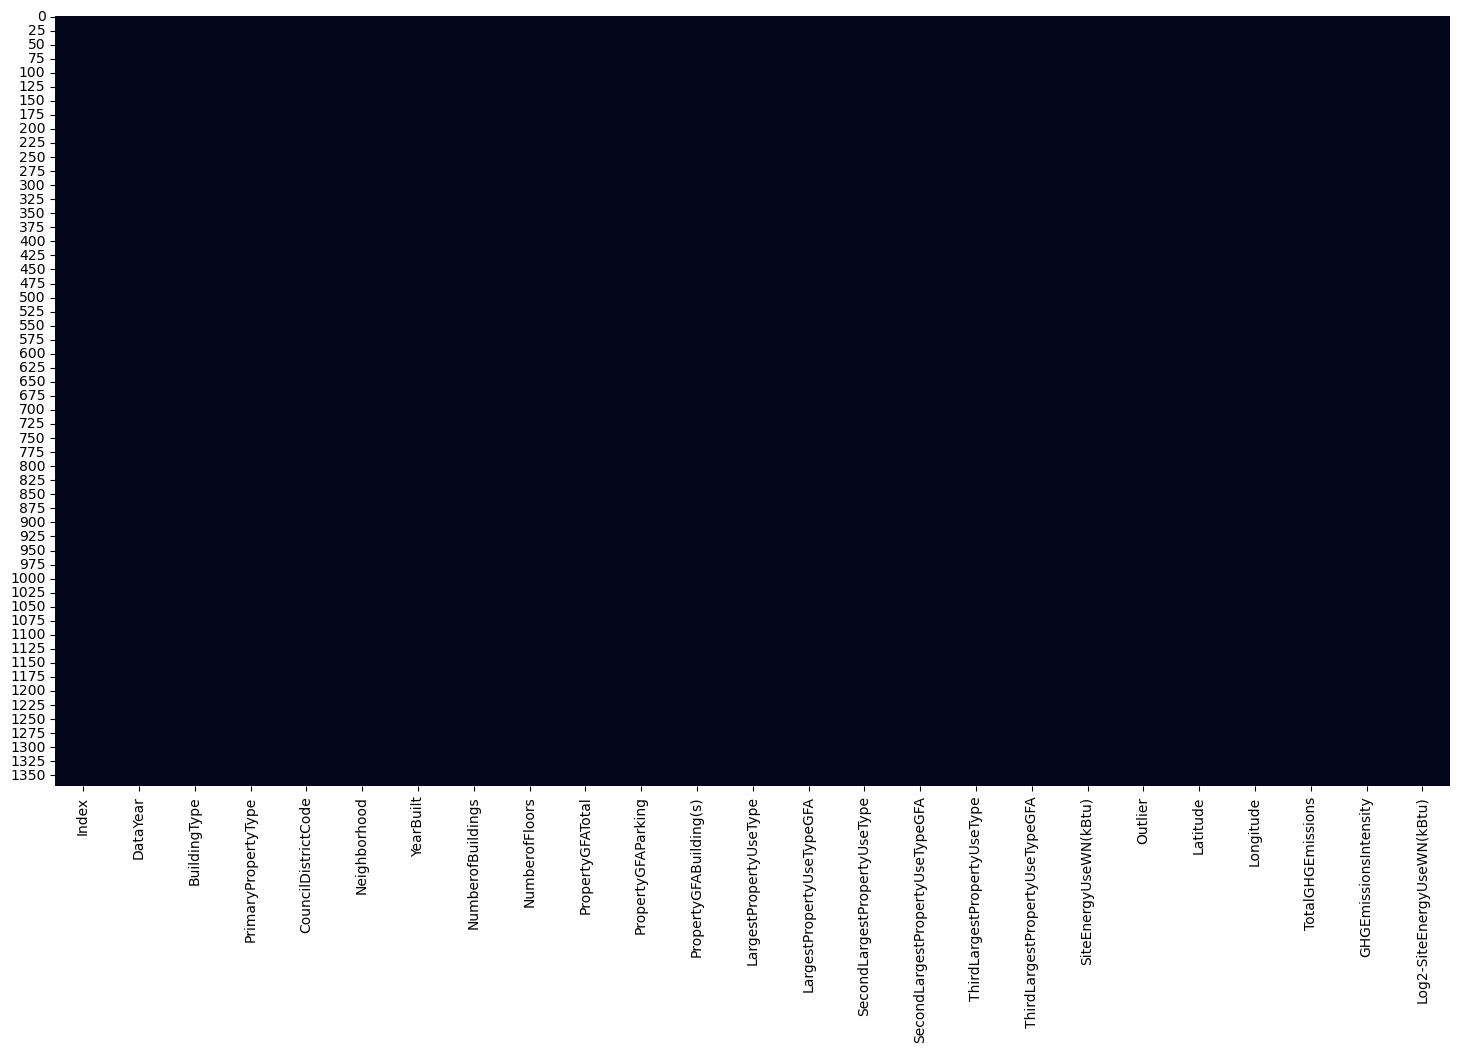

In [20]:
plt.figure(figsize=(18,10))
sns.heatmap(datas.isnull(), cbar=False)

In [21]:
#Nombre de valeurs manquantes totales
nb_nan_tot     = datas.isna().sum().sum()
nb_donnees_tot = np.product(datas.shape)
pourc_nan_tot  = round((nb_nan_tot/nb_donnees_tot)*100,2)

print(f'Valeurs manquantes : {nb_nan_tot} NaN pour {nb_donnees_tot} données ({pourc_nan_tot} %)')

Valeurs manquantes : 0 NaN pour 34250 données (0.0 %)


<div class="alert alert-info">
    <font id="section_1">
        <h1 style="font-size:25px;"><strong>01. Préparation de SiteEnergyUseWN</strong></h1>
</div>

### Séparation X et y

In [22]:
X = datas.copy().drop(['SiteEnergyUseWN(kBtu)'], axis=1)
y = datas.copy()[['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'Log2-SiteEnergyUseWN(kBtu)']]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y['SiteEnergyUseWN(kBtu)'], test_size = 0.2, random_state = 42)

### Normalisation & One Hot Encoder

In [24]:
X.select_dtypes(['category','object']).nunique()

BuildingType                     5
PrimaryPropertyType             22
Neighborhood                    13
LargestPropertyUseType          53
SecondLargestPropertyUseType    44
ThirdLargestPropertyUseType     28
Outlier                          2
dtype: int64

In [25]:
X.shape

(1370, 24)

In [26]:
categorical_columns = X.select_dtypes(['category','object']).columns
numerical_columns = X.select_dtypes(['int32','float64']).columns

In [27]:
categorical_columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'Outlier'],
      dtype='object')

In [28]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()

# Mise à l'échelle des caractéristiques numériques
X[numerical_columns] = ss.fit_transform(X[numerical_columns])

# Application du OneHotEncoder aux caractéristiques catégorielles
ohe_features = ohe.fit_transform(X[categorical_columns])

# Obtention des noms des caractéristiques générées par le OneHotEncoder
ohe_feature_names = ohe.get_feature_names_out(input_features=categorical_columns)

# Création d'un nouveau DataFrame en combinant les caractéristiques numériques mises à l'échelle et les caractéristiques catégorielles encodées
X_encoded = pd.DataFrame(data=ohe_features, columns=ohe_feature_names)
X = pd.concat([X[numerical_columns], X_encoded], axis=1)


Transformation des types des catégories sorties du one hot encoding

In [29]:
import re
regex = re.compile(r'x\d_')
for column in X.columns:
    if regex.search(column):
        X[column] = X[column].astype('int32')

In [30]:
X.sample(5)

,NumberofBuildings,NumberofFloors,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity,Log2-SiteEnergyUseWN(kBtu),BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,...,SecondLargestPropertyUseType_Social/Meeting Hall,SecondLargestPropertyUseType_Supermarket/Grocery Store,SecondLargestPropertyUseType_Swimming Pool,SecondLargestPropertyUseType_Vocational School,SecondLargestPropertyUseType_Worship Facility,ThirdLargestPropertyUseType_Bank Branch,ThirdLargestPropertyUseType_Data Center,ThirdLargestPropertyUseType_Distribution Center,ThirdLargestPropertyUseType_Fast Food Restaurant,ThirdLargestPropertyUseType_Financial Office,ThirdLargestPropertyUseType_Food Service,ThirdLargestPropertyUseType_K-12 School,ThirdLargestPropertyUseType_Laboratory,ThirdLargestPropertyUseType_Medical Office,ThirdLargestPropertyUseType_Multifamily Housing,ThirdLargestPropertyUseType_No Use,ThirdLargestPropertyUseType_Non-Refrigerated Warehouse,ThirdLargestPropertyUseType_Office,ThirdLargestPropertyUseType_Other,ThirdLargestPropertyUseType_Other - Education,ThirdLargestPropertyUseType_Other - Entertainment/Public Assembly,ThirdLargestPropertyUseType_Other - Restaurant/Bar,ThirdLargestPropertyUseType_Parking,ThirdLargestPropertyUseType_Pre-school/Daycare,ThirdLargestPropertyUseType_Refrigerated Warehouse,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Self-Storage Facility,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Strip Mall,ThirdLargestPropertyUseType_Supermarket/Grocery Store,ThirdLargestPropertyUseType_Swimming Pool,ThirdLargestPropertyUseType_Vocational School,Outlier_Low Outlier,Outlier_Normal
1213,-0.14505,-0.05506,-0.54067,-0.20202,0.12828,-0.29245,0.90438,0.12761,2.14995,0.15800,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
443,-0.14505,0.17012,-0.51649,0.30148,3.13193,-0.22673,0.51170,-0.58000,-0.69574,0.13217,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
285,-0.14505,0.17012,-0.19637,0.51998,0.36528,0.50726,0.26514,-0.47035,-0.61736,0.43673,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
829,-0.14505,-0.05506,-0.48371,-0.36179,-0.19785,1.86721,0.41560,-0.47397,-0.15916,-0.17389,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1109,-0.14505,-0.50544,-0.25325,-0.36179,-0.19785,0.92924,0.55858,-0.58161,

<div class="alert alert-info">
    <font id="section_2">
        <h1 style="font-size:25px;"><strong>02. Infos sur X et y</strong></h1>
</div>

In [31]:
X.shape

(1370, 177)

In [32]:
y.shape

(1370, 3)

### Séparation jeu de données                                                

**Séparation test / train**

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y['Log2-SiteEnergyUseWN(kBtu)'], test_size = 0.2, random_state = 42 )

In [34]:
X_train.shape

(1096, 177)

In [35]:
X_test.shape

(274, 177)

In [36]:
y_train.shape

(1096,)

In [37]:
y_test.shape

(274,)

In [38]:
results = pd.DataFrame({})

In [39]:
print(X_train.isna().sum().sum())
print(X_test.isna().sum().sum())
print(y_train.isna().sum().sum())
print(y_test.isna().sum().sum())

0
0
0
0


<div class="alert alert-info">
    <font id="section_3">
        <h1 style="font-size:25px;"><strong>03. Modélisation</strong></h1>
</div>

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## Linear Regression / Ridge Regression / Lasso / Elastic Net

Le modèle Elastic Net comprend les modèles linéaires / ridge et lasso via les valeurs des coefficients dans le grid search CV

In [41]:
from sklearn.linear_model import ElasticNet

#rappel de la fonction de coût du elasticnet
#1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
ElasticNet(max_iter=10000)

parameters = {'tol' : [0.1,0.01,0.001,0.0001],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  #alpha, coef qui multiplie le terme de pénalité)
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}#L1 ratio , =1 équivaut à un Lasso, 0 à un Ridge


elastic_grid = GridSearchCV(estimator = ElasticNet(), 
                      param_grid = parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5,
                      verbose=0
                     )

elastic_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error')

In [42]:
elastic_grid.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.9, 'tol': 0.0001}

Le modèle optimal a les caractéristiques suivantes:

Le résultat `elastic_grid.best_params_` affiche les meilleurs paramètres trouvés par la recherche en grille (`GridSearchCV`) pour le modèle ElasticNet. Cela signifie qu'après avoir testé différentes combinaisons de valeurs des paramètres dans la grille spécifiée, il a été déterminé que les meilleurs paramètres pour cet ensemble de données sont :

- `alpha` : 0.0001
- `l1_ratio` : 0.9
- `tol` : 0.0001

Ces valeurs sont celles qui ont produit les meilleures performances en termes de la métrique de score utilisée, qui dans ce cas est l'erreur quadratique moyenne négative (`neg_mean_squared_error`).

In [43]:
import math
results = results.append(pd.DataFrame({
    'Modèle' : ['Elasticnet Regression'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(elastic_grid.predict(X_test), y_test))]}),
              ignore_index=True)

## Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

parameters = {
    'n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}

In [45]:
rfr_search = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

rfr_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.4s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.4s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.4s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.4s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.8s
[CV] END max_

[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   2.4s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   2.3s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   2.3s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   2.4s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; tot

[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.7s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500]},
             verbose=2)

In [46]:
rfr_search.best_params_

{'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 500}

In [47]:
import math
results = results.append(pd.DataFrame({
    'Modèle' : ['Random Forest Regressor'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(rfr_search.predict(X_test), y_test))]}), ignore_index=True)

In [48]:
coefficients = abs(rfr_search.best_estimator_.feature_importances_)
liste_coefs_rer = pd.concat((pd.DataFrame(X.columns, columns = ['Variable']), 
                      pd.DataFrame(coefficients, columns = ['Coefficient'])), axis = 1).sort_values(by='Coefficient', ascending = False)

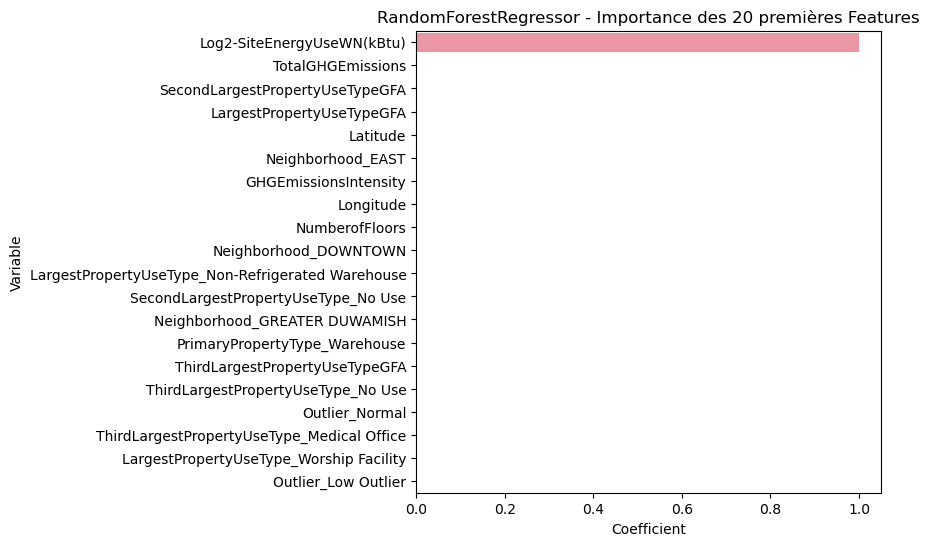

In [50]:
plt.figure(figsize=(6,6))
plt.title('RandomForestRegressor - Importance des 20 premières Features')
sns.barplot(y = liste_coefs_rer['Variable'].head(20),
            x = liste_coefs_rer['Coefficient'].head(20))
plt.show()

## Support Vector Regression

In [ ]:
from sklearn.svm import SVR

parameters = {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1, 1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1, 10]} #parametre de régularisation

svm = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                      cv=5,
                   verbose=2
                     )

svm.fit(X_train, y_train)

In [ ]:
svm.best_params_

In [ ]:
results = results.append(pd.DataFrame({
    'Modèle' : ['Support Vector Machine'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(svm.predict(X_test), y_test))]}),
              ignore_index=True)

## XG Boost 

In [ ]:
from xgboost import XGBRegressor

In [ ]:
parameters = {
    'n_estimators' : [100,500,1000,2000]
}
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                        cv = 5,
                        verbose=5)
xgb_grid.fit(X_train, y_train)

In [ ]:
xgb_grid.best_params_

In [ ]:
xgb_grid.best_estimator_

In [ ]:
xgb_grid.best_estimator_.feature_importances_

In [ ]:
import math
results = results.append(pd.DataFrame({
    'Modèle' : ['XGBoost'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(xgb_grid.predict(X_test), y_test))]}),
              ignore_index=True)

In [ ]:
results

## Export des modèles pour réutilisation ultérieure

In [ ]:
rfr_search

In [ ]:
dict_modeles = {
    'Elastic Net': elastic_grid.best_estimator_,
    'Random Forest Regressor' : rfr_search.best_estimator_,
    'SVM' : svm.best_estimator_,
    'XGBoost' : xgb_grid.best_estimator_,
}

<div class="alert alert-info">
    <font id="section_4">
        <h1 style="font-size:25px;"><strong>04. Comparaison des modèles</strong></h1>
</div>

In [ ]:
results['RMSE_%'] = results['Score_RMSE'].divide(y_test.mean())

In [ ]:
results

Dans le tableau, les modèles présentent des scores RMSE plus élevés par rapport aux valeurs réelles, ce qui indique une erreur de prédiction plus importante. Les scores RMSE sont autour de 3,7, ce qui signifie que l'erreur moyenne de prédiction est d'environ 3,7 unités par rapport aux valeurs réelles.

Les % RMSE sont d'environ 0,18 %, ce qui représente une **erreur relative moyenne d'environ 0,18 %** par rapport à la valeur à prédire. 

En conclusion, les modèles du tableau montrent une performance moins précise en termes de prédiction par rapport aux valeurs réelles, ce qui souligne la nécessité d'améliorer les modèles ou d'explorer d'autres approches pour obtenir de meilleurs résultats.

In [ ]:
plt.figure(figsize=(12,4))
plt.title('Comparaison des RMSE relatives des modèles (en %)')
chart = sns.barplot(x = results['Modèle'], 
               y = results['RMSE_%']*100)
chart.set_xticklabels(labels = results['Modèle'], 
                      rotation=45,
                     horizontalalignment='right',
                     size=12,
                     )
ax = plt.gca()
ax.set_ylim([0, 5])
plt.show()

Elasticnet Regression et Random Forest Regressor sont les modèles avec la plus faible RMSE.

Regardons quel algorithme est entraîné le plus rapidement et prédit le plus rapidement, pour voir lequel sélectionner pour les étapes suivantes

Comparaison avec la RMSE pour un estimateur donnant la valeur moyenne

In [ ]:
math.sqrt(mean_squared_error(y_train.mean()*np.ones(y_test.shape[0]), y_test))

In [ ]:
rfr_search.best_estimator_

le modèle Random Forest semble plus rapide à entraîner

In [ ]:
list(dict_modeles.keys())

In [ ]:
plt.title('Temps d\'exécution des algorithmes pour la prédiction \n(jeu d\'entrainement) - échelle logarithmique')
#sns.barplot(x=nom_modeles,
sns.barplot(x=list(dict_modeles.keys()),            
           y = [5.32, 640, 2.14, 145])
ax = plt.gca()
ax.set_yscale('log')

Le temps d'exécution du modèle **XGBoost** est significativement plus faible que celui du modèle **Random Forest** (environ 4 fois plus rapide). Cette différence de temps d'exécution peut être considérée comme un critère important lors du choix entre XGBoost et Random Forest Regressor, même si cela implique une légère dégradation des performances.

En effet, un temps d'exécution réduit permet d'obtenir les prédictions plus rapidement, ce qui peut être avantageux dans des situations où le temps est un facteur critique, notamment pour les grands ensembles de données ou les applications en temps réel. Le modèle **XGBoost** offre ainsi une alternative intéressante en offrant une exécution plus rapide tout en maintenant une performance raisonnablement bonne.

Cependant, il est important de noter que le compromis entre le temps d'exécution et la performance dépend du contexte spécifique du problème. Dans certains cas, la performance peut être le critère principal, tandis que dans d'autres cas, le temps d'exécution peut prendre le dessus. 

En résumé, si le temps d'exécution est un facteur critique pour la application et que on est prêt à accepter une légère dégradation de la performance, **XGBoost** peut être une option intéressante à considérer en raison de sa rapidité d'exécution par rapport à Random Forest Regressor.

<div class="alert alert-info">
    <font id="section_5">
        <h1 style="font-size:25px;"><strong>05. Vérification des prédictions</strong></h1>
</div>

Regardons avec un exemple ce que donne la prédiction

In [ ]:
X_extrait = X_test
y_extrait = y_test

In [ ]:
X_extrait.head()

In [ ]:
y_extrait.head()

In [ ]:
type(y_extrait)

<div class="alert alert-info">
    <font id="section_6">
        <h1 style="font-size:25px;"><strong>06. Intérêt du Energy Star Score</strong></h1>
</div>

In [ ]:
X_en = X.copy()

In [ ]:
X_en['energy_star_score'] = energy_star_score

In [ ]:
y_en = y['Log2-SiteEnergyUseWN(kBtu)'].copy()
y_en.drop(X_en[X_en['energy_star_score'].isna()].index, inplace=True)

In [ ]:
X_en.drop(X_en[X_en['energy_star_score'].isna()].index, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_en_train, X_en_test, y_en_train, y_en_test = train_test_split(X_en, y_en, test_size = 0.2, random_state = 42)

In [ ]:
model_en = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

model_en.fit(X_en_train, y_en_train)

In [ ]:
math.sqrt(mean_squared_error(model_en.predict(X_en_test), y_en_test))

Entrainons un autre modèle avec les mêmes données sans le Energy Star Score

In [ ]:
X_en_train.drop(['energy_star_score'], axis=1, inplace=True)
X_en_test.drop(['energy_star_score'], axis=1, inplace=True)

In [ ]:
model_en = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

model_en.fit(X_en_train, y_en_train)

In [ ]:
math.sqrt(mean_squared_error(model_en.predict(X_en_test), y_en_test))

<div class="alert alert-info">
    <font id="section_7">
    <h1 style="font-size:25px;"><strong>07. Liens importants</strong></h1>
</div>

* <a href="https://openclassrooms.com/fr/projects/629/assignmen" target="_blank">Lien vers consignes : </a>

* <a href="https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/interpret-your-results/what" target="_blank">Lien vers score Star Energy : </a>

* <a href="https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy" target="_blank">Lien vers la signification des variables: </a>

* Notebooks consultés
* 1. <a href="https://www.kaggle.com/code/marcbourgeois/p-lec-01-cleaning" target="_blank">Kaggle Notebook 1  : </a>
* 2. <a href="https://www.kaggle.com/code/marcbourgeois/p-lec-01-cleaning" target="_blank">Kaggle Notebook 2  : </a>

In [ ]:
#Enregistrer le temps de fin
fin = time.time()

In [ ]:
#Calculer la durée en secondes
durée = (fin - début) / 60

In [ ]:
#Afficher le temps d'exécution
print("Le temps d'exécution était de", durée, "minutes.")